In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np
import random
from typing import Callable
from collections.abc import Iterable

## Input

In [2]:
N_SAMPLES = 5000
N_TRIALS = 10

Original Sample

In [3]:
c1, s1 = 38, 53
c2, s2 = 14, 31 

## Simulation Functions

In [4]:
def get_randomization_dist(
    sampling_func: Callable, n_trials: int, n_samples: int, *args, **kwargs):
    """
    Creates `n_trials` randomization distributions (RD) for a difference in
    means using an input sampling function and returns the RD corresponding to
    the median standard error.
    """
    samples, rd_centers, rd_se = [], [], []
    
    for _ in range(n_trials):

        s = [] # container for current trial
        for _ in range(n_samples):
        
            s.append(sampling_func(*args, **kwargs))

        samples.append(s)    
        rd_centers.append(sum(s) / len(s))
        rd_se.append(np.std(s, ddof = 1))

    i = (rd_se == np.sort(rd_se)[len(rd_se)//2]).argmax() # get index of median
   
    return samples[i], rd_centers[i], rd_se[i]


def add_text(ax, t, xy):
    ax = ax.annotate(t, xy=xy, xycoords='data',
        xytext=(30, 0), textcoords='offset points')

def plot_hist(diffs, avg, se, bins):
        
    fig, ax = plt.subplots(figsize =(8,6))
    ax = sns.histplot(x = diffs, bins = bins, ax = ax)

    ax.axvline(x=avg, linewidth=2, color='firebrick', linestyle = 'dashed')
    add_text(ax, f'Mean: {avg:.4f}, SE = {se:.4f}', (avg+0.02, 500))
    return ax

def add_sample_stat(ax, x):
    ax.axvline(x=x, linewidth=3, color='blue', linestyle = 'solid')

## Running Simulation

In [5]:
def sample_diff_proportion_reallocation(c1: int, s1: int, c2: int, s2: int):
    
    """
    Args:
        c1, s1 = Count and sample size of group 1.
        c2, s2 = Count and sample size of group 2.    
    """
    g1 = [1 for _ in range(c1)] + [0 for _ in range(c1, s1)]
    assert len(g1) == s1

    g2 = [1 for _ in range(c2)] + [0 for _ in range(c2, s2)]
    assert len(g2) == s2

    pool = g1 + g2
    
    random.shuffle(pool)
    return np.mean(pool[:len(g1)]) - np.mean(pool[len(g1):])

In [6]:
diffs, avg, se = get_randomization_dist(
    sample_diff_proportion_reallocation, N_TRIALS, N_SAMPLES, c1, s1, c2, s2)

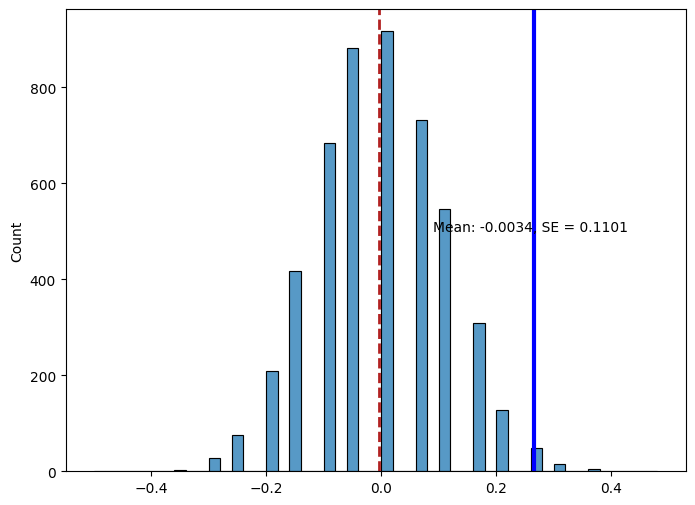

In [7]:
ax = plot_hist(diffs, avg, se, np.arange(-0.5, 0.5, 0.02))
add_sample_stat(ax, (c1/s1) - (c2/s2))

P-value

In [8]:
sum(np.array(diffs) >= (c1/s1) - (c2/s2)) / N_SAMPLES

0.0136